In [1]:
#Nikhil Kagalwala
#Nick Project

In [ ]:
# Test change for github
# balls

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import date
from calendar import monthrange

%matplotlib inline

In [3]:
df = pd.read_csv("September 2021 Count Report.csv")

In [4]:
#get month and year from csv
date_arr = (df["Date"][0]).split("/")
year = int(date_arr[2][:4])
month = int(date_arr[0])
#get (first day of month, num of days in month)
monthData = monthrange(year,month)

#create 2D array for each day of the week (starting with monday), initialize it
# [i,j] = day of the week -> all dates of month that are on this day
# [0,0] = sep_6 (first monday of the month)

daysOfWeekData = [None, None, None, None, None, None, None]
for i in range(1, monthData[1] + 1):
    strDate = str(month) + "/" + str(i) + "/" + str(year) + " 0:00"
    data = df[df["Date"] == strDate]
    index = ((i + monthData[0]) % 7) - 1
    #define each first day of day of week
    if (i < 8):
        if (index == -1):
            index = 6
        daysOfWeekData[index] = [data]
    else:
        if (index == -1):
            index = 6
        daysOfWeekData[index].extend([data])

In [7]:
# data for all days
aggDayData = [None, None, None, None, None, None, None]
totalCounts = [None, None, None, None, None, None, None]

for i in range(7):
    aggDayData[i] = pd.concat(daysOfWeekData[i])
    totalCounts[i] = aggDayData[i]["Total Count"].sum()

# empty array used to properly initialize other arrays 
empty = [None, None, None, None, None, None, None]
allRooms = [empty, empty, empty, empty, empty, empty, empty, empty, empty]
allRoomNames = ["Nick Level 1 Fitness", "Nick Level 2 Fitness", "Nick Level 3 Fitness",
                "Nick Power House", "Nick Track", "Soderholm Family Aquatic Center",
                "Nick Courts 1 & 2", "Nick Courts 3-6", "Nick Courts 7 & 8"]
allRoomsAvg = [empty, empty, empty, empty, empty, empty, empty, empty, empty]
    
for i in range(9):
    for j in range(7):
        allRooms[i][j] = aggDayData[j][aggDayData[j]["Location"] == allRoomNames[i]]
        allRoomsAvg[i][j] = allRooms[i][j]["Total Count"].mean()
    

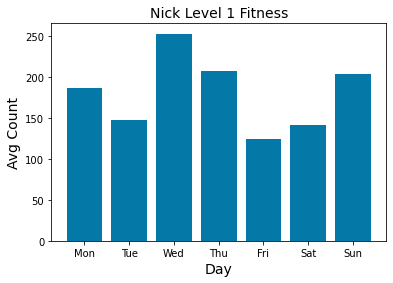

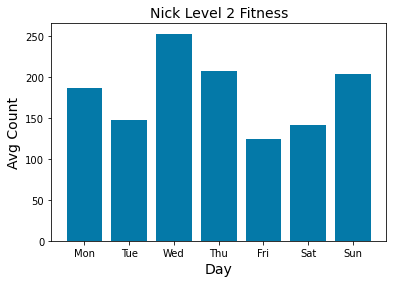

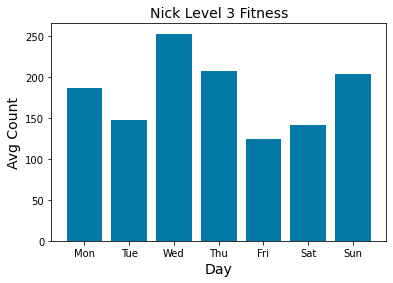

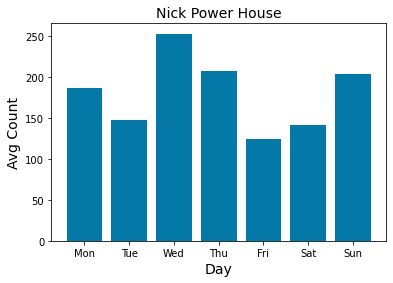

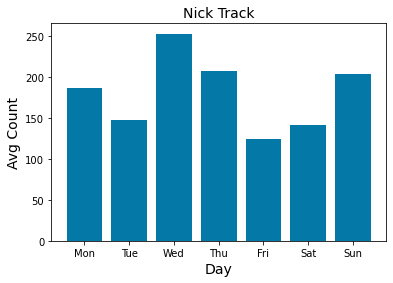

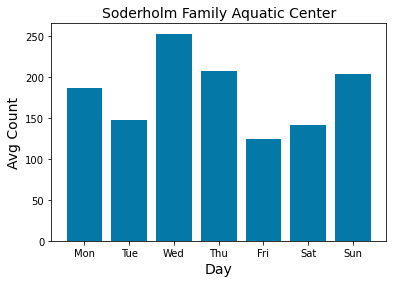

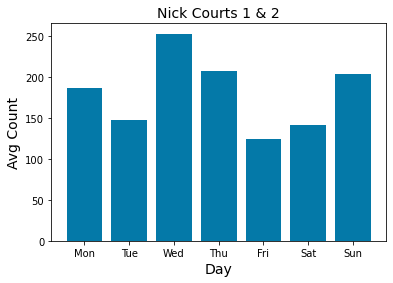

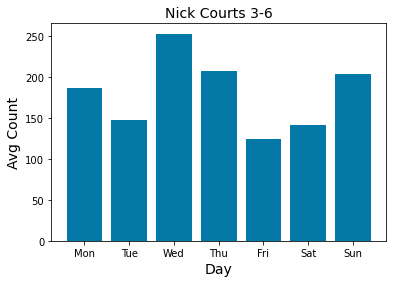

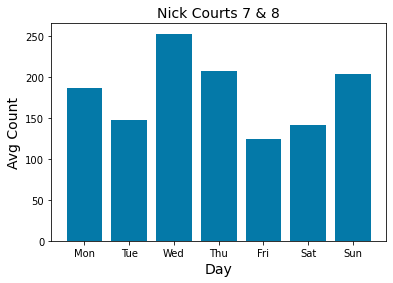

In [10]:
daysLabel = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(len(allRoomNames)):
    plt.bar(daysLabel, allRoomsAvg[i], color="#0479a8")
    plt.ylabel('Avg Count', fontsize=14)
    plt.xlabel('Day', fontsize=14)
    plt.title(allRoomNames[i], fontsize=14)
    plt.show()
